cross entropy loss　分類問題

In [ ]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更して下さい。

In [ ]:
%cd "ctorch210929/MiniCTorch_Prototype/notebook"

/content/drive/My Drive/Colab Notebooks/ctorch210929/MiniCTorch_Prototype/notebook


In [ ]:
! pip install lark-parser

     |████████████████████████████████| 103 kB 6.5 MB/s 


In [ ]:
import sys
sys.path.append("../")

import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import minictorch.generator as GN
import minictorch.converter as CV

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

データ読み込み

In [ ]:
# データ読み込み
iris = datasets.load_iris()
data   = iris['data']
target = iris['target']

# 学習データと検証データに分割
x_train, x_valid, y_train, y_valid = train_test_split( data, target, shuffle=True )

# 特徴量の標準化
scaler = StandardScaler()
scaler.fit( x_train )

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

# Tensor型に変換
# 学習に入れるときはfloat型 or long型になっている必要があるのここで変換してしまう
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_valid = torch.from_numpy(x_valid).float()
y_valid = torch.from_numpy(y_valid).long()

#print('x_train : ', x_train.shape)
#print('y_train : ', y_train.shape)
#print('x_valid : ', x_valid.shape)
#print('y_valid : ', y_valid.shape)

DataSetとDataLoaderの生成

In [ ]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

# indexを指定すればデータを取り出すことができます。
index = 0
print( train_dataset.__getitem__(index)[0].size() )
print( train_dataset.__getitem__(index)[1] )


batch_size = 112
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 動作確認
# こんな感じでバッチ単位で取り出す子ができます。
# イテレータに変換
batch_iterator = iter(train_dataloader)

# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
print(inputs.size())
print(labels.size())
print(inputs)
print(labels)

torch.Size([4])
tensor(2)
torch.Size([112, 4])
torch.Size([112])
tensor([[ 7.5603e-01, -1.2699e-01,  9.7357e-01,  7.8536e-01],
        [-1.2800e+00,  9.8768e-02, -1.2219e+00, -1.3027e+00],
        [ 9.9556e-01, -1.2699e-01,  8.0469e-01,  1.4379e+00],
        [ 3.7427e-02, -1.2699e-01,  2.4176e-01,  3.9385e-01],
        [ 1.7142e+00, -3.5274e-01,  1.4239e+00,  7.8536e-01],
        [-2.0211e-01, -5.7850e-01,  1.8547e-01,  1.3284e-01],
        [ 9.9556e-01,  9.8768e-02,  1.0299e+00,  1.5684e+00],
        [ 2.7696e-01, -1.2699e-01,  6.3581e-01,  7.8536e-01],
        [ 3.7427e-02,  3.2452e-01,  5.7952e-01,  7.8536e-01],
        [ 7.5603e-01, -1.2699e-01,  1.1424e+00,  1.3074e+00],
        [-4.4164e-01,  2.5821e+00, -1.3344e+00, -1.3027e+00],
        [ 2.1932e+00, -1.0300e+00,  1.7617e+00,  1.4379e+00],
        [ 2.7696e-01, -1.2699e-01,  4.6693e-01,  2.6334e-01],
        [ 9.9556e-01,  5.5028e-01,  1.0862e+00,  1.6989e+00],
        [-3.2187e-01, -5.7850e-01,  6.3581e-01,  1.0464e+00],
     

ニューラルネットワークの定義

In [ ]:
class Net(nn.Module):    
    def __init__(self,t):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        self.target = t
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.log_softmax(x, dim=1)
        #return x
        
        #print(x);
        #print(self.target);
        self.out = x

        loss = nn.CrossEntropyLoss()
        #loss = nn.NLLLoss()
        output = loss(x,self.target)
        return output
        

class Net2(nn.Module):    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 3)
        #self.fc1 = nn.Linear(4, 128)
        #self.fc2 = nn.Linear(128, 3)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        #x = F.softmax(x, dim=1)
        return x

In [ ]:
def generate_json( json_path, input, target ):

    model = Net( target )
    model.eval()
    with torch.no_grad():
        print("[SAVE]", json_path )
        GN.generate_minictorch_file( model, input, json_path )

    return model

In [ ]:
torch.manual_seed( 1 )

print("inputs",inputs)
print("target",labels)
inputs.requires_grad = True

project = 'cse1'
json_path = '../network/' + project +'.json'

model = generate_json( json_path, inputs, labels )

with torch.set_grad_enabled(True):

  output = model( inputs )
  print("output",output)

  model.zero_grad()
  output.backward()
  print("output grad",output.grad)
  print("input grad",inputs.grad)

  # ラベルを予測
  #print("output", model.out, inputs.size(0))
  _, preds = torch.max( model.out, 1 )

  # イテレーション結果の計算
  epoch_loss = output * inputs.size(0)

  # 正解数の合計を更新
  epoch_corrects = torch.sum( preds == labels.data )

  epoch_loss = epoch_loss / float(inputs.size(0))
  epoch_acc  = epoch_corrects.double() / float(inputs.size(0))

  epoch=1
  print('Train Loss {}: {:.4f} Acc: {:.4f}'.format( epoch, epoch_loss, epoch_acc ))

inputs tensor([[ 7.5603e-01, -1.2699e-01,  9.7357e-01,  7.8536e-01],
        [-1.2800e+00,  9.8768e-02, -1.2219e+00, -1.3027e+00],
        [ 9.9556e-01, -1.2699e-01,  8.0469e-01,  1.4379e+00],
        [ 3.7427e-02, -1.2699e-01,  2.4176e-01,  3.9385e-01],
        [ 1.7142e+00, -3.5274e-01,  1.4239e+00,  7.8536e-01],
        [-2.0211e-01, -5.7850e-01,  1.8547e-01,  1.3284e-01],
        [ 9.9556e-01,  9.8768e-02,  1.0299e+00,  1.5684e+00],
        [ 2.7696e-01, -1.2699e-01,  6.3581e-01,  7.8536e-01],
        [ 3.7427e-02,  3.2452e-01,  5.7952e-01,  7.8536e-01],
        [ 7.5603e-01, -1.2699e-01,  1.1424e+00,  1.3074e+00],
        [-4.4164e-01,  2.5821e+00, -1.3344e+00, -1.3027e+00],
        [ 2.1932e+00, -1.0300e+00,  1.7617e+00,  1.4379e+00],
        [ 2.7696e-01, -1.2699e-01,  4.6693e-01,  2.6334e-01],
        [ 9.9556e-01,  5.5028e-01,  1.0862e+00,  1.6989e+00],
        [-3.2187e-01, -5.7850e-01,  6.3581e-01,  1.0464e+00],
        [-9.2071e-01,  1.6791e+00, -1.0530e+00, -1.0417e+00],
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.


In [ ]:
"""
def convert_json( project, folder, model, input_x, json_path, rand_flag=0 ):

    #folder = "src"
    cpp_fname   = project + ".cpp"
    param_fname = project + "_param.cpp"
    cpp_path    = folder + "/" + cpp_fname
    param_path  = folder + "/" + param_fname
    make_path   = folder + "/" + "Makefile"

    # load json file
    print( "[JSON]", json_path )
    fp = open( json_path )
    obj = json.load( fp )

    # save parameter file
    code1 = CV.c_param_generator( obj, model, input_x )
    if len( code1 ) > 0:
       print( "[PARAM]", param_path )
       ofparam = open( param_path, "w" )
       ofparam.write( code1 )

    # save cpp file
    print( "[CPP]  ", cpp_path )
    code2 = CV.c_code_generator( obj, model, rand_flag )

    #ofp=open(args.path+"/"+args.output,"w")
    ofp = open( cpp_path, "w" )
    ofp.write( code2 )

    # save make file
    print( "[MAKE] ", make_path )
    make_code = CV.makefile_generator( cpp_fname )

    #makefp=open(args.path+"/"+"Makefile","w")
    makefp = open( make_path, "w" )
    makefp.write( make_code )
"""

In [ ]:
CV.convert_json( project, "../src", model, inputs, json_path )

[JSON] ../network/cse1.json
{'name': 'Net/Linear[fc1]/weight/35', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
{'name': 'Net/Linear[fc1]/bias/34', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
{'name': 'Net/Linear[fc2]/weight/38', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 5}
{'name': 'Net/Linear[fc2]/bias/37', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 6}
[PARAM] ../src/cse1_param.cpp
{'name': 'input/x', 'op': 'IO Node', 'in': [], 'output_id': 0, 'shape': [112, 4], 'out': [3], 'sorted_id': 0}
{'name': 'Net/Linear[fc1]/weight/35', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
Net/Linear[fc1]/weight/35  ->  fc1_weight
{'name': 'Net/Linear[fc1]/bias/34', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
Net/Linear[fc1]/bias/34  -> 

In [ ]:
!g++ -std=c++14 ../src/cse1.cpp ../src/cse1_param.cpp -I ../../../xtensor -lcblas -o ../bin/cse1

(注意) xtensorフォルダにxtensor関連のincludeを置いています。各自の環境に合わせて変更して下さい。

In [ ]:
!../bin/cse1

### forward computation ...
 1.152917
### backward computation ...
input_grad{{ 0.000752,  0.001224, -0.000689,  0.000829},
 {-0.001236, -0.000504,  0.000378, -0.000497},
 { 0.000196,  0.000858, -0.000707,  0.000904},
 { 0.000385, -0.00069 ,  0.000564, -0.001009},
 { 0.001172,  0.001094, -0.0005  ,  0.000558},
 { 0.001   , -0.000487,  0.001263, -0.000468},
 { 0.000529,  0.000853, -0.000538,  0.000618},
 { 0.000843,  0.00097 , -0.00105 ,  0.00085 },
 { 0.000077, -0.000668, -0.000282, -0.001585},
 { 0.000541,  0.001501, -0.000375,  0.000752},
 {-0.00146 ,  0.000381,  0.000359,  0.00034 },
 { 0.001397,  0.000793, -0.000713,  0.000632},
 {-0.000134, -0.000561,  0.000073, -0.001736},
 { 0.000215,  0.001014,  0.000013,  0.00068 },
 { 0.001006,  0.000986, -0.001194,  0.000863},
 {-0.001906, -0.000084,  0.000534,  0.000315},
 {-0.00022 , -0.00065 , -0.000483, -0.001152},
 {-0.001381, -0.000598,  0.000337, -0.000319},
 { 0.001401,  0.001095, -0.000465,  0.000049},
 { 0.000554,  0.001066, -0.000

In [ ]:
torch.manual_seed( 1 )

#print("target",target)
inputs.requires_grad = True

#model = Net( labels )
model = Net2()

num = inputs.size(0)

#project = 'test5'
#json_path = 'network/' + project +'.json'

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.01 )

num_epochs = 300

acc = []

for epoch in range(num_epochs):
  with torch.set_grad_enabled(True):

    model.train()   # モデルを訓練モードに設定

    outputs = model( inputs )
    #print(outputs)
    #print(labels)
    #print("input grad",inputs.grad)

    loss = criterion( outputs, labels )
    print("loss ",epoch, " - ",loss)

    # ラベルを予測
    #print("output", outputs, num )
    _, preds = torch.max( outputs, 1 )
    #print(labels)
    #print(preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # イテレーション結果の計算
    epoch_loss = loss.item() * float(num)

    # 正解数の合計を更新
    epoch_corrects = torch.sum( preds == labels )

    epoch_loss = epoch_loss / float(num)
    epoch_acc  = epoch_corrects.double() / float(num)
    print('Train Loss {}: {:.4f} Acc: {:.4f} {}'.format( epoch, epoch_loss, epoch_acc, epoch_corrects ))

    acc.append( epoch_acc )

loss  0  -  tensor(1.1529, grad_fn=<NllLossBackward>)
Train Loss 0: 1.1529 Acc: 0.1518 17
loss  1  -  tensor(1.1285, grad_fn=<NllLossBackward>)
Train Loss 1: 1.1285 Acc: 0.1696 19
loss  2  -  tensor(1.1051, grad_fn=<NllLossBackward>)
Train Loss 2: 1.1051 Acc: 0.1786 20
loss  3  -  tensor(1.0826, grad_fn=<NllLossBackward>)
Train Loss 3: 1.0826 Acc: 0.1696 19
loss  4  -  tensor(1.0610, grad_fn=<NllLossBackward>)
Train Loss 4: 1.0610 Acc: 0.1786 20
loss  5  -  tensor(1.0403, grad_fn=<NllLossBackward>)
Train Loss 5: 1.0403 Acc: 0.1964 22
loss  6  -  tensor(1.0205, grad_fn=<NllLossBackward>)
Train Loss 6: 1.0205 Acc: 0.2143 24
loss  7  -  tensor(1.0014, grad_fn=<NllLossBackward>)
Train Loss 7: 1.0014 Acc: 0.2589 29
loss  8  -  tensor(0.9832, grad_fn=<NllLossBackward>)
Train Loss 8: 0.9832 Acc: 0.3125 35
loss  9  -  tensor(0.9658, grad_fn=<NllLossBackward>)
Train Loss 9: 0.9658 Acc: 0.4107 46
loss  10  -  tensor(0.9490, grad_fn=<NllLossBackward>)
Train Loss 10: 0.9490 Acc: 0.5000 56
loss  11

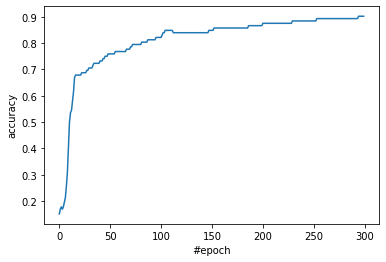

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))),acc )
ax.set_xlabel('#epoch')
ax.set_ylabel('accuracy')
fig.show()

C++のコードは手作業で修正しています。

In [ ]:
!g++ -std=c++14 ../src/cse1.cpp ../src/cse1_param.cpp ../src/cse1_train.cpp -I ../../../xtensor -lcblas -o ../bin/cse1_train

In [ ]:
!../bin/cse1_train

epoch 0 - loss 1.15292 - accuracy 0.151786
epoch 1 - loss 1.12852 - accuracy 0.169643
epoch 2 - loss 1.10508 - accuracy 0.178571
epoch 3 - loss 1.08259 - accuracy 0.169643
epoch 4 - loss 1.06101 - accuracy 0.178571
epoch 5 - loss 1.04031 - accuracy 0.196429
epoch 6 - loss 1.02046 - accuracy 0.214286
epoch 7 - loss 1.00144 - accuracy 0.258929
epoch 8 - loss 0.983218 - accuracy 0.3125
epoch 9 - loss 0.965757 - accuracy 0.410714
epoch 10 - loss 0.949032 - accuracy 0.5
epoch 11 - loss 0.933012 - accuracy 0.535714
epoch 12 - loss 0.917665 - accuracy 0.544643
epoch 13 - loss 0.902962 - accuracy 0.580357
epoch 14 - loss 0.888876 - accuracy 0.616071
epoch 15 - loss 0.875378 - accuracy 0.669643
epoch 16 - loss 0.862441 - accuracy 0.678571
epoch 17 - loss 0.850039 - accuracy 0.678571
epoch 18 - loss 0.838145 - accuracy 0.678571
epoch 19 - loss 0.826735 - accuracy 0.678571
epoch 20 - loss 0.815785 - accuracy 0.678571
epoch 21 - loss 0.805272 - accuracy 0.678571
epoch 22 - loss 0.795173 - accuracy

In [ ]:
f = open('./cse1.out', 'r')

loss = []
acc=[]

datalist = f.readlines()
for data in datalist:
  #print(data)
  ds = data.split(',')
  loss.append( float(ds[0]) )
  acc.append( float(ds[1]) )

f.close()

print("epoch =", len(loss))
print( loss )

epoch = 300
[1.152917, 1.128515, 1.105082, 1.082587, 1.061006, 1.040308, 1.020464, 1.001443, 0.983218, 0.965757, 0.949032, 0.933012, 0.917665, 0.902962, 0.888876, 0.875378, 0.862441, 0.850039, 0.838145, 0.826735, 0.815785, 0.805272, 0.795173, 0.785468, 0.776137, 0.767161, 0.758522, 0.750202, 0.742185, 0.734454, 0.726997, 0.719799, 0.712847, 0.706129, 0.699634, 0.693349, 0.687266, 0.681374, 0.675663, 0.670126, 0.664753, 0.659537, 0.654471, 0.649547, 0.64476, 0.640102, 0.635568, 0.631153, 0.626852, 0.622659, 0.61857, 0.61458, 0.610685, 0.606882, 0.603166, 0.599533, 0.595982, 0.592507, 0.589107, 0.585778, 0.582519, 0.579324, 0.576195, 0.573126, 0.570117, 0.567165, 0.564268, 0.561425, 0.558634, 0.555892, 0.553198, 0.550551, 0.547949, 0.545391, 0.542876, 0.540401, 0.537967, 0.535572, 0.533215, 0.530894, 0.528608, 0.526357, 0.524139, 0.521954, 0.519801, 0.517678, 0.515585, 0.513521, 0.511486, 0.509478, 0.507498, 0.505545, 0.503618, 0.501716, 0.499839, 0.497985, 0.496155, 0.494348, 0.492563, 

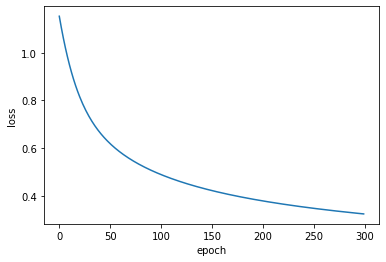

In [ ]:
# 交差エントロピー誤差
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(loss))), loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

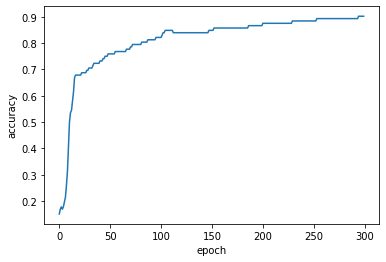

In [ ]:
# 正解率
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(acc))), acc)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig.show()